In [ ]:
# Importações
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# É necessário ter o arquivo "trabalho3_dados_8.csv" no ambiente do colab
db = pd.read_csv("trabalho3_dados_8.csv")

In [ ]:
# Para tirar warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Conhecendo os dados

In [ ]:
# Exibe as "n" primeiras linhas
n = 10
db.head(n)

,ABSORVENTE,ACETONA,ACHOCOLATADO,ACUCAR,ADOCANTE,AGUA_OXIGENADA,AGUA,AGULHEIRO,ALGODAO,AMENDOIN,...,TOALHA_DE_BANHO,TORNEIRA,TORRADA,TRIGO_DE_QUIBE,UTEN_COZINHA,VEDA_ROSCA,VELA_DE_FILTRO,VELA,VERDURAS,VINAGRE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Formato da base (número de linhas e colunas)
db.shape

(8027, 142)

In [ ]:
# Tipos de dados
db.dtypes
print(db.dtypes)

ABSORVENTE        int64
ACETONA           int64
ACHOCOLATADO      int64
ACUCAR            int64
ADOCANTE          int64
                  ...  
VEDA_ROSCA        int64
VELA_DE_FILTRO    int64
VELA              int64
VERDURAS          int64
VINAGRE           int64
Length: 142, dtype: object


In [ ]:
# Resumo das informações do conjunto de dados
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8027 entries, 0 to 8026
Columns: 142 entries, ABSORVENTE to VINAGRE
dtypes: int64(142)
memory usage: 8.7 MB


## Verificação de valores ausentes

In [ ]:
# Verificação de valores ausentes
md_count = db.isnull().sum()
md_count

,0
ABSORVENTE,0
ACETONA,0
ACHOCOLATADO,0
ACUCAR,0
ADOCANTE,0
...,...
VEDA_ROSCA,0
VELA_DE_FILTRO,0
VELA,0
VERDURAS,0


In [ ]:
# Verificar se há dados duplicados
print(db.duplicated().sum())

4353


In [ ]:
db[db.duplicated(keep=False)].shape

(4915, 142)

In [ ]:
# Seleciona uma linha duplicada para visualização
example_duplicate = db[db.duplicated(keep=False)].iloc[0]

# Mostrar as ocorrências dessa exemplo
especif_row = db[db.eq(example_duplicate).all(axis=1)]
especif_row

,ABSORVENTE,ACETONA,ACHOCOLATADO,ACUCAR,ADOCANTE,AGUA_OXIGENADA,AGUA,AGULHEIRO,ALGODAO,AMENDOIN,...,TOALHA_DE_BANHO,TORNEIRA,TORRADA,TRIGO_DE_QUIBE,UTEN_COZINHA,VEDA_ROSCA,VELA_DE_FILTRO,VELA,VERDURAS,VINAGRE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Mostrar a distribuição de duplicatas em grupos
duplicates = db[db.duplicated(keep=False)]
count_group = duplicates.groupby(duplicates.columns.tolist()).size()
print(count_group.value_counts())

2      234
3      112
4       48
5       28
7       20
6       19
8       11
9       10
10       8
12       7
13       6
16       5
22       4
14       3
15       3
25       3
32       3
18       3
11       2
20       2
43       2
37       2
112      2
33       2
90       2
463      1
294      1
111      1
161      1
21       1
27       1
38       1
50       1
52       1
151      1
19       1
66       1
17       1
49       1
34       1
115      1
48       1
40       1
81       1
42       1
54       1
Name: count, dtype: int64


## Verificações de inconsistência

In [ ]:
# Colunas com nome repetido
duplicated_cols = db.columns[db.columns.duplicated()]
print("Colunas duplicadas pelo nome:", duplicated_cols.tolist())

Colunas duplicadas pelo nome: []


In [ ]:
# Verificar se existem valores diferentes de 0 ou 1
inconsistent_columns = {}
for col in db.columns:
  unique_values = db[col].unique()
  if not all(val in [0, 1] for val in unique_values):
    inconsistent_columns[col] = unique_values

if inconsistent_columns:
  print("Colunas com valores inconsistentes (diferentes de 0 ou 1):")
  for col, values in inconsistent_columns.items():
    print(f"- {col}: {values}")
else:
  print("Nenhuma inconsistência encontrada. Todos os valores são 0 ou 1.")

Nenhuma inconsistência encontrada. Todos os valores são 0 ou 1.


In [ ]:
# Conferir se alguma coluna não é numérica
print("Tipos de dados:")
print(db.dtypes.value_counts())

# Conferir se existem valores 'estranhos' que parecem texto
for col in db.columns:
  if db[col].dtype == "object":
    print(f"Coluna {col} tem valores não numéricos: {db[col].unique()[:10]}")

Tipos de dados:
int64    142
Name: count, dtype: int64


# Tratamento dos dados

## **Pular**: Remoção de linhas duplicadas

Embora em bases de dados de transações duplicatas sejam possíveis, a remoção de duplicatas garante que cada combinação única de itens seja considerada apenas uma vez para a análise de regras de associação, evitando vieses causados por transações idênticas repetidas.

In [ ]:
# Remover linhas duplicadas
db_without_duplicated = db.drop_duplicates()

# Verificar o novo formato da base (número de linhas e colunas)
print("Formato da base de dados após remover duplicatas:", db_without_duplicated.shape)

Formato da base de dados após remover duplicatas: (3674, 142)


## Itens que todo mundo comprou ou ninguém comprou

*   Se um item aparece em quase 100% das transações, ele sempre estará no antecedente e consequente, e não revela nada de novo.
*   Se aparece em quase 0% das transações, não tem suporte suficiente para gerar regras.

In [ ]:
item_support = db.mean().sort_values(ascending=False)

In [ ]:
# Top itens mais comprados e menos comprados
print("Itens mais comprados:")
print(item_support.head(10))

print("\nItens menos comprados:")
print(item_support.tail(10))

Itens mais comprados:
REFRIGERANTE        0.174536
LEGUMES             0.160957
PAES                0.129189
PROD_LIMPEZA        0.122711
SUCO                0.118600
QUEIJOS             0.102155
FRUTAS              0.096300
LEITE               0.095428
BEBIDA_ALCOOLICA    0.070886
COMIDA_PET          0.070886
dtype: float64

Itens menos comprados:
GRAXA_DE_SAPATO    0.000249
CARNE_SECA         0.000249
GELO               0.000249
TAPETE             0.000249
GUARDA_CHUVA       0.000249
BAND-AID           0.000125
GELEIA             0.000125
COGUMELOS          0.000125
TORNEIRA           0.000125
VEDA_ROSCA         0.000125
dtype: float64


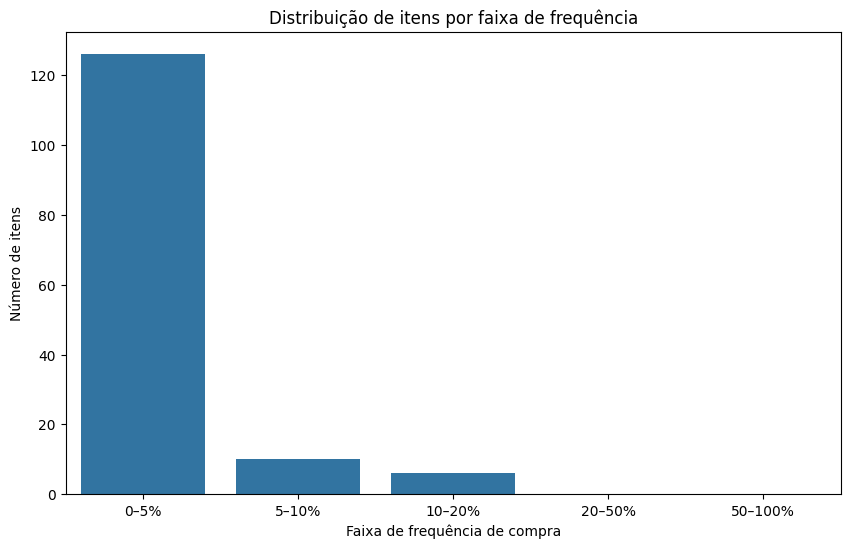

In [ ]:
bins = [0, 0.05, 0.1, 0.2, 0.5, 1.0]
labels = ["0–5%", "5–10%", "10–20%", "20–50%", "50–100%"]
freq_groups = pd.cut(item_support, bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(x=freq_groups)
plt.title("Distribuição de itens por faixa de frequência")
plt.xlabel("Faixa de frequência de compra")
plt.ylabel("Número de itens")
plt.show()

In [ ]:
col_sum = db.sum()
print(col_sum)
print(db.shape)

# Itens que nunca aparecem
never_bought = col_sum[col_sum == 0]

# Itens que aparecem em todas as transações
always_bought = col_sum[col_sum == db.shape[0]]

print("Itens nunca comprados:", never_bought.index.tolist())
print("Itens comprados em todas as transações:", always_bought.index.tolist())

ABSORVENTE        107
ACETONA            32
ACHOCOLATADO      374
ACUCAR            392
ADOCANTE           30
                 ... 
VEDA_ROSCA          1
VELA_DE_FILTRO      8
VELA               79
VERDURAS           16
VINAGRE            45
Length: 142, dtype: int64
(8027, 142)
Itens nunca comprados: []
Itens comprados em todas as transações: []


## Linhas sem nenhuma compra ou linhas com todos os itens comprados

In [ ]:
# Somar os itens comprados em cada transação
row_sum = db.sum(axis=1)

# Numero de colunas (itens)
n_items = db.shape[1]

# Identificar transações com todos os itens = 0
all_zero = row_sum == 0

# Identificar transações com todos os itens = 1
all_one = row_sum == n_items

# Contar quantas existem
print("Transações sem compra (tudo 0):", all_zero.sum())
print("Transações com todos os itens (tudo 1):", all_one.sum())

Transações sem compra (tudo 0): 463
Transações com todos os itens (tudo 1): 0


In [ ]:
# Remover transações com todos os itens = 0
print(db.shape)
db = db[~(all_zero)].copy()
print(db.shape)

(8027, 142)
(7564, 142)


# Geração de regras de associação

In [ ]:
itemsets = fpgrowth(db, min_support=0.035, use_colnames=True)
itemsets

,support,itemsets
0,0.101269,(LEITE)
1,0.051824,(MANTEIGA)
2,0.185219,(REFRIGERANTE)
3,0.044289,(EMBUTIDOS)
4,0.170809,(LEGUMES)
5,0.137097,(PAES)
6,0.102195,(FRUTAS)
7,0.052089,(UTEN_COZINHA)
8,0.048519,(OVO)
9,0.108408,(QUEIJOS)


In [ ]:
itemsets.shape

(43, 2)

In [ ]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.8)
rules.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(CHOCOLATE),(BALA),0.035034,0.035034,0.035034,1.0,28.543396,1.0,0.033807,inf,1.0,1.0,1.0,1.0
8,(BALA),(CHOCOLATE),0.035034,0.035034,0.035034,1.0,28.543396,1.0,0.033807,inf,1.0,1.0,1.0,1.0
1,(CHA),(ARROZ),0.041777,0.041777,0.041777,1.0,23.936709,1.0,0.040032,inf,1.0,1.0,1.0,1.0
0,(ARROZ),(CHA),0.041777,0.041777,0.041777,1.0,23.936709,1.0,0.040032,inf,1.0,1.0,1.0,1.0
5,(ACHOCOLATADO),(BOMBOM),0.049445,0.049445,0.049445,1.0,20.224599,1.0,0.047000,inf,1.0,1.0,1.0,1.0
4,(BOMBOM),(ACHOCOLATADO),0.049445,0.049445,0.049445,1.0,20.224599,1.0,0.047000,inf,1.0,1.0,1.0,1.0
7,(CAFE),(ACUCAR),0.051824,0.051824,0.051824,1.0,19.295918,1.0,0.049139,inf,1.0,1.0,1.0,1.0
6,(ACUCAR),(CAFE),0.051824,0.051824,0.051824,1.0,19.295918,1.0,0.049139,inf,1.0,1.0,1.0,1.0
2,(BEBIDA_ALCOOLICA),(COMIDA_PET),0.075225,0.075225,0.075225,1.0,13.293497,1.0,0.069566,inf,1.0,1.0,1.0,1.0
3,(COMIDA_PET),(BEBIDA_ALCOOLICA),0.075225,0.075225,0.075225,1.0,13.293497,1.0,0.069566,inf,1.0,1.0,1.0,1.0


# Explorando regras de associação

## Diferentes valores de suporte mínimo e confiança

In [ ]:
supports = [0.01, 0.015, 0.02] # valores de suporte mínimo
thresholds = [0.6, 0.7, 0.8, 0.9] # valores de confiança mínima

results = []

for s in supports:
  itemsets = fpgrowth(db, min_support=s, use_colnames=True)
  for t in thresholds:
    rules = association_rules(itemsets, metric="confidence", min_threshold=t)
    results.append({
      "min_support": s,
      "min_confidence": t,
      "n_itemsets": itemsets.shape[0],
      "n_rules": rules.shape[0]
    })
results_db = pd.DataFrame(results)
results_db

,min_support,min_confidence,n_itemsets,n_rules
0,0.010,0.6,908,3281
1,0.010,0.7,908,2358
2,0.010,0.8,908,1297
3,0.010,0.9,908,680
4,0.015,0.6,195,70
5,0.015,0.7,195,66
6,0.015,0.8,195,66
7,0.015,0.9,195,62
8,0.020,0.6,90,19
9,0.020,0.7,90,18


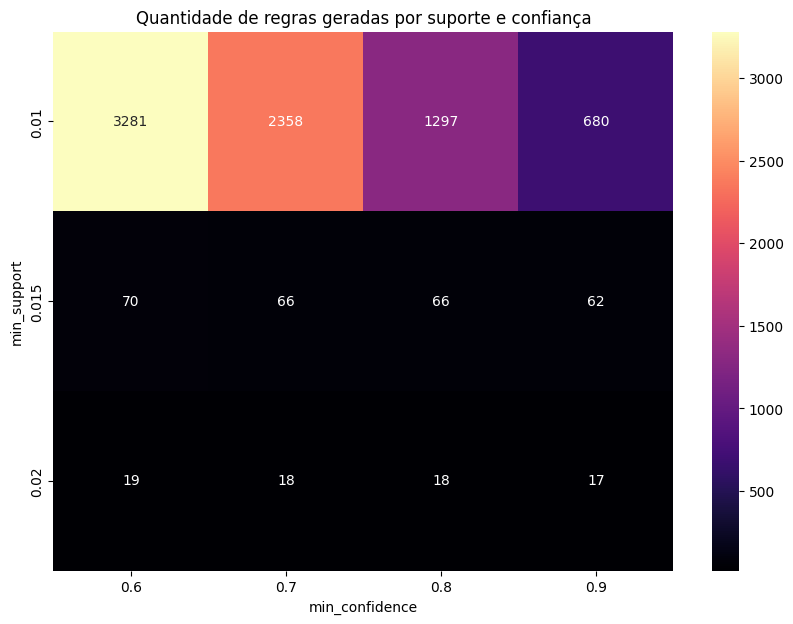

In [ ]:
# Heatmap
pivot = results_db.pivot(index="min_support", columns="min_confidence", values="n_rules")
plt.figure(figsize=(10,7))
sns.heatmap(pivot, annot=True, fmt="d", cmap="magma")
plt.title("Quantidade de regras geradas por suporte e confiança")
plt.show()

In [ ]:
supports = [0.011, 0.012, 0.013, 0.014, 0.015] # valores de suporte mínimo
thresholds = [0.6, 0.7, 0.8, 0.9] # valores de confiança mínima

results = []

for s in supports:
  itemsets = fpgrowth(db, min_support=s, use_colnames=True)
  for t in thresholds:
    rules = association_rules(itemsets, metric="confidence", min_threshold=t)
    results.append({
      "min_support": s,
      "min_confidence": t,
      "n_itemsets": itemsets.shape[0],
      "n_rules": rules.shape[0]
    })
results_db = pd.DataFrame(results)
results_db

,min_support,min_confidence,n_itemsets,n_rules
0,0.011,0.6,577,1387
1,0.011,0.7,577,925
2,0.011,0.8,577,493
3,0.011,0.9,577,364
4,0.012,0.6,398,668
5,0.012,0.7,398,424
6,0.012,0.8,398,263
7,0.012,0.9,398,202
8,0.013,0.6,302,330
9,0.013,0.7,302,279


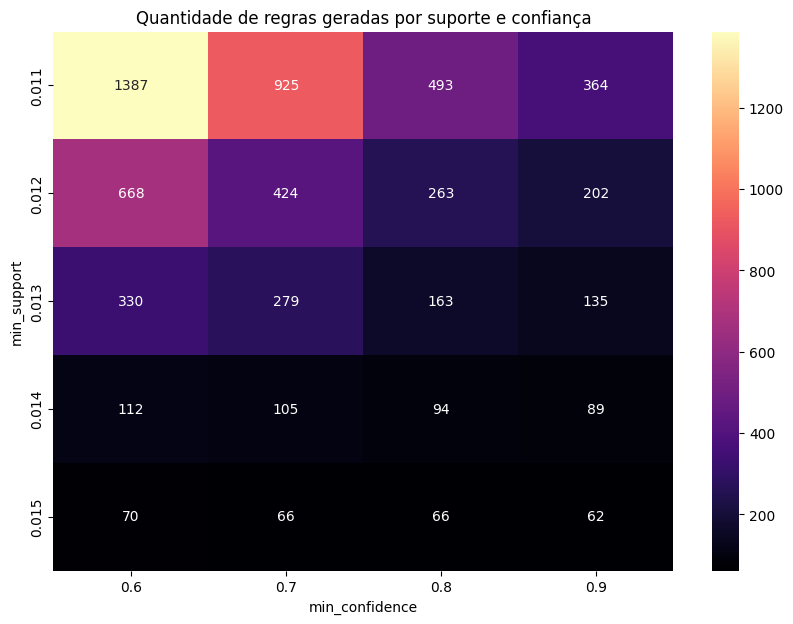

In [ ]:
# Heatmap
pivot = results_db.pivot(index="min_support", columns="min_confidence", values="n_rules")
plt.figure(figsize=(10,7))
sns.heatmap(pivot, annot=True, fmt="d", cmap="magma")
plt.title("Quantidade de regras geradas por suporte e confiança")
plt.show()

Suporte mínimo escolhido: 0.0115
Itens que passam do suporte mínimo: 67 (47.2%)
Itens mais próximos do limite:
INSETICIDA    0.012031
GELATINA      0.011105
VELA          0.010444
dtype: float64


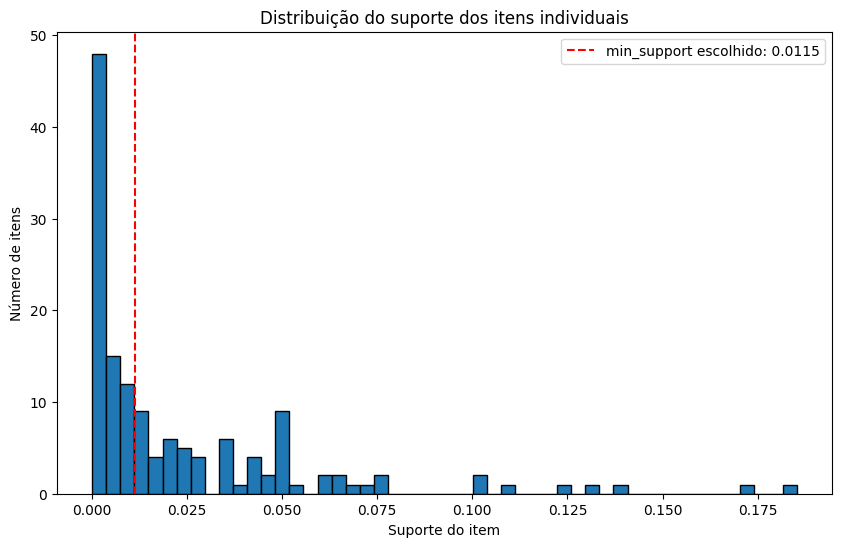

In [ ]:
# Validação
item_supports = db.mean().sort_values(ascending=False)  # proporção de transações com o item

# função para validar suporte escolhido
def validate_support(min_support):
  n_items_valid = (item_supports >= min_support).sum()
  perc_items_valid = n_items_valid / len(item_supports) * 100
  print(f"Suporte mínimo escolhido: {min_support:.4f}")
  print(f"Itens que passam do suporte mínimo: {n_items_valid} ({perc_items_valid:.1f}%)")
  print("Itens mais próximos do limite:")
  print(item_supports[(item_supports >= min_support*0.9) & (item_supports <= min_support*1.1)])
  return n_items_valid

c_min_sup = 0.0115
# Exemplo de uso
validate_support(c_min_sup)  # substitua pelo suporte que você está testando

# Visualização da distribuição de suportes dos itens
plt.figure(figsize=(10,6))
plt.hist(item_supports, bins=50, edgecolor='black')
plt.axvline(c_min_sup, color='red', linestyle='--', label=f'min_support escolhido: {c_min_sup}')
plt.title("Distribuição do suporte dos itens individuais")
plt.xlabel("Suporte do item")
plt.ylabel("Número de itens")
plt.legend()
plt.show()

## Utilizando min_support de 0.0115 e min_threshold de 0.8

In [ ]:
itemsets = fpgrowth(db, min_support=0.0115, use_colnames=True)
rules = association_rules(itemsets, metric="confidence", min_threshold=0.8)
rules.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
326,(ABSORVENTE),(BISCOITO),0.014146,0.014146,0.014146,1.000000,70.691589,1.0,0.013946,inf,1.000000,1.000000,1.000000,1.000000
325,(BISCOITO),(ABSORVENTE),0.014146,0.014146,0.014146,1.000000,70.691589,1.0,0.013946,inf,1.000000,1.000000,1.000000,1.000000
187,(CHINELO),(AZEITONA),0.015336,0.015336,0.015336,1.000000,65.206897,1.0,0.015101,inf,1.000000,1.000000,1.000000,1.000000
188,(AZEITONA),(CHINELO),0.015336,0.015336,0.015336,1.000000,65.206897,1.0,0.015101,inf,1.000000,1.000000,1.000000,1.000000
305,"(FEIJAO, CAFE, CHA)","(ACUCAR, ARROZ)",0.013617,0.018641,0.013617,1.000000,53.645390,1.0,0.013363,inf,0.994907,0.730496,1.000000,0.865248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,"(OLEO_VEGETAL, MACARRAO)",(PROD_LIMPEZA),0.016261,0.130222,0.013088,0.804878,6.180810,1.0,0.010971,4.457612,0.852065,0.098117,0.775665,0.452693
199,"(LEGUMES, LIMP_ROUPAS)",(PROD_LIMPEZA),0.022210,0.130222,0.017848,0.803571,6.170776,1.0,0.014955,4.427960,0.856980,0.132613,0.774162,0.470314
203,"(PROD_BANHO, CAFE)",(PROD_LIMPEZA),0.016526,0.130222,0.013221,0.800000,6.143350,1.0,0.011069,4.348889,0.851290,0.099010,0.770056,0.450761
227,"(ACUCAR, PROD_BANHO, CAFE)",(PROD_LIMPEZA),0.016526,0.130222,0.013221,0.800000,6.143350,1.0,0.011069,4.348889,0.851290,0.099010,0.770056,0.450761


In [ ]:
rules.shape

(331, 14)

In [ ]:
rules.sort_values(by="support", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
165,(BEBIDA_ALCOOLICA),(COMIDA_PET),0.075225,0.075225,0.075225,1.0,13.293497,1.0,0.069566,inf,1.000000,1.000000,1.0,1.000000
166,(COMIDA_PET),(BEBIDA_ALCOOLICA),0.075225,0.075225,0.075225,1.0,13.293497,1.0,0.069566,inf,1.000000,1.000000,1.0,1.000000
207,(CAFE),(ACUCAR),0.051824,0.051824,0.051824,1.0,19.295918,1.0,0.049139,inf,1.000000,1.000000,1.0,1.000000
206,(ACUCAR),(CAFE),0.051824,0.051824,0.051824,1.0,19.295918,1.0,0.049139,inf,1.000000,1.000000,1.0,1.000000
191,(ACHOCOLATADO),(BOMBOM),0.049445,0.049445,0.049445,1.0,20.224599,1.0,0.047000,inf,1.000000,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,"(ARROZ, SUCO)",(CHA),0.011502,0.041777,0.011502,1.0,23.936709,1.0,0.011021,inf,0.969373,0.275316,1.0,0.637658
25,"(CHA, SUCO)",(ARROZ),0.011502,0.041777,0.011502,1.0,23.936709,1.0,0.011021,inf,0.969373,0.275316,1.0,0.637658
275,"(LEGUMES, FEIJAO, ARROZ)",(CHA),0.011502,0.041777,0.011502,1.0,23.936709,1.0,0.011021,inf,0.969373,0.275316,1.0,0.637658
267,"(ESPECIARIAS, FEIJAO, ARROZ)",(CHA),0.011502,0.041777,0.011502,1.0,23.936709,1.0,0.011021,inf,0.969373,0.275316,1.0,0.637658


## Itemsets inseparáveis

In [ ]:
import numpy as np

mask = (
    np.isclose(rules["antecedent support"], rules["consequent support"], rtol=1e-5, atol=1e-8)
    & np.isclose(rules["antecedent support"], rules["support"], rtol=1e-5, atol=1e-5)
)

rules[mask]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
23,(CHA),(ARROZ),0.041777,0.041777,0.041777,1.0,23.936709,1.0,0.040032,inf,1.0,1.0,1.0,1.0
24,(ARROZ),(CHA),0.041777,0.041777,0.041777,1.0,23.936709,1.0,0.040032,inf,1.0,1.0,1.0,1.0
41,"(CHA, CAFE)","(ACUCAR, ARROZ)",0.018641,0.018641,0.018641,1.0,53.645390,1.0,0.018293,inf,1.0,1.0,1.0,1.0
42,"(ARROZ, CAFE)","(CHA, ACUCAR)",0.018641,0.018641,0.018641,1.0,53.645390,1.0,0.018293,inf,1.0,1.0,1.0,1.0
43,"(CHA, ACUCAR)","(ARROZ, CAFE)",0.018641,0.018641,0.018641,1.0,53.645390,1.0,0.018293,inf,1.0,1.0,1.0,1.0
44,"(ACUCAR, ARROZ)","(CHA, CAFE)",0.018641,0.018641,0.018641,1.0,53.645390,1.0,0.018293,inf,1.0,1.0,1.0,1.0
165,(BEBIDA_ALCOOLICA),(COMIDA_PET),0.075225,0.075225,0.075225,1.0,13.293497,1.0,0.069566,inf,1.0,1.0,1.0,1.0
166,(COMIDA_PET),(BEBIDA_ALCOOLICA),0.075225,0.075225,0.075225,1.0,13.293497,1.0,0.069566,inf,1.0,1.0,1.0,1.0
187,(CHINELO),(AZEITONA),0.015336,0.015336,0.015336,1.0,65.206897,1.0,0.015101,inf,1.0,1.0,1.0,1.0
188,(AZEITONA),(CHINELO),0.015336,0.015336,0.015336,1.0,65.206897,1.0,0.015101,inf,1.0,1.0,1.0,1.0


### Visualização de regras

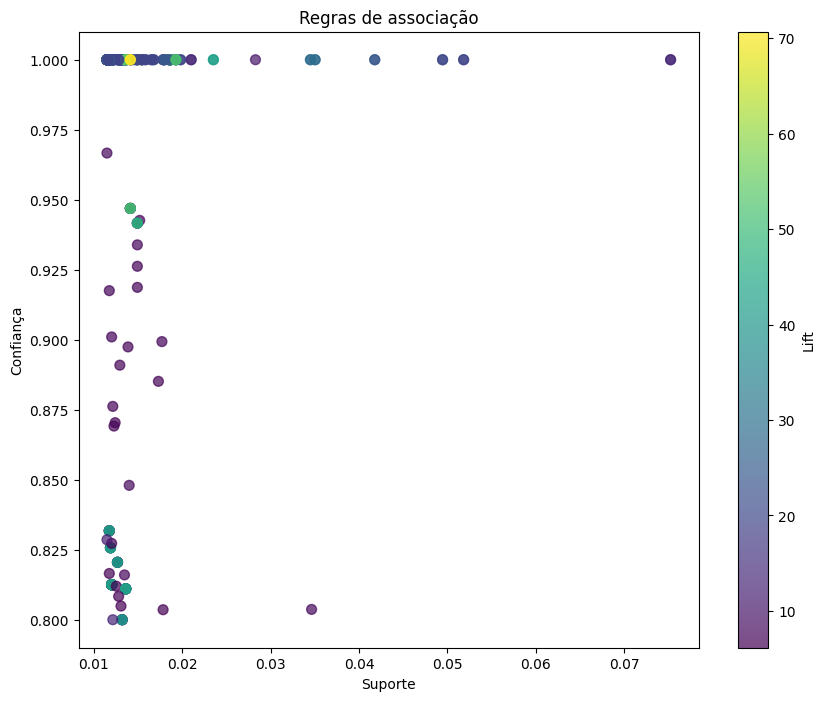

In [ ]:
# Scatter plot (Suporte × Confiança, cor = Lift)
plt.figure(figsize=(10,8))
scatter = plt.scatter(
  rules['support'],
  rules['confidence'],
  c=rules['lift'],
  cmap='viridis',
  s=50,
  alpha=0.7
)

plt.colorbar(scatter, label="Lift")
plt.xlabel("Suporte")
plt.ylabel("Confiança")
plt.title("Regras de associação")
plt.show()

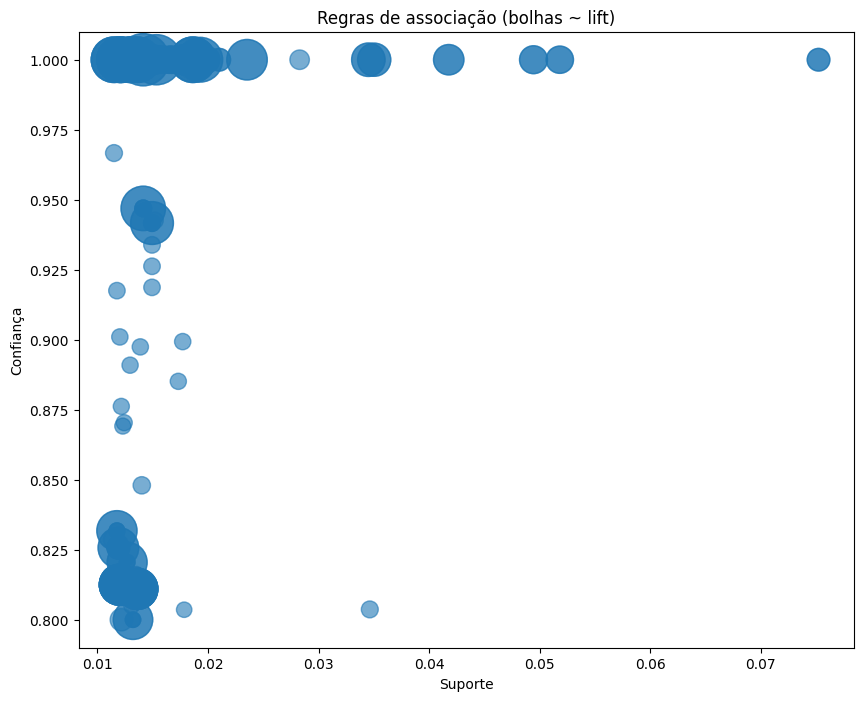

In [ ]:
# Gráfico de bolhas (tamanho = lift ou suporte)
plt.figure(figsize=(10,8))
plt.scatter(
  rules['support'],
  rules['confidence'],
  s=rules['lift']*20,
  alpha=0.6
)
plt.xlabel("Suporte")
plt.ylabel("Confiança")
plt.title("Regras de associação (bolhas ~ lift)")
plt.show()

## Trocando itemsets inseparáveis por seus representantes

In [ ]:
print(db.shape)
db = db.drop(columns=[
    "ACUCAR", "ARROZ","CHA",  # "CAFE"
    "BEBIDA_ALCOOLICA",  # "COMIDA_PET"
    "AZEITONA", # "CHINELO"
    "BOMBOM", # "ACHOCOLATADO"
    "AGUA", # "CANUDO"
    "BALA", # "CHOCOLATE"
    "BISCOITO", # "ABSORVENTE"
    "BATATA_PALHA", # "COMIDA_CONGELADA"
    "CORTADOR_DE_UNHA", # "BEBIDAS_SEM_ALCOOL"
])
db.shape

(7564, 142)


(7564, 131)

In [ ]:
db.rename(columns = {
    "CAFE": "GRUPO_ACUCAR_ARROZ_CHA_CAFE",
    "COMIDA_PET": "GRUPO_BEBIDA_ALCOOLICA_COMIDA_PET",
    "CHINELO": "GRUPO_AZEITONA_CHINELO",
    "ACHOCOLATADO": "GRUPO_BOMBOM_ACHOCOLATADO",
    "CANUDO": "GRUPO_AGUA_CANUDO",
    "CHOCOLATE": "GRUPO_BALA_CHOCOLATE",
    "ABSORVENTE": "GRUPO_BISCOITO_ABSORVENTE",
    "COMIDA_CONGELADA": "GRUPO_BATATA_PALHA_COMIDA_CONGELADA",
    "BEBIDAS_SEM_ALCOOL": "GRUPO_CORTADOR_DE_UNHA_BEBIDAS_SEM_ALCOOL",
}
)

,GRUPO_BISCOITO_ABSORVENTE,ACETONA,GRUPO_BOMBOM_ACHOCOLATADO,ADOCANTE,AGUA_OXIGENADA,AGULHEIRO,ALGODAO,AMENDOIN,AMONIA,APRESUNTADO,...,TOALHA_DE_BANHO,TORNEIRA,TORRADA,TRIGO_DE_QUIBE,UTEN_COZINHA,VEDA_ROSCA,VELA_DE_FILTRO,VELA,VERDURAS,VINAGRE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8024,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
itemsets = fpgrowth(db, min_support=0.0115, use_colnames=True)
rules = association_rules(itemsets, metric="confidence", min_threshold=0.8)
rules.sort_values(by="confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,(CREME_DE_LEITE),(LEITE),0.028292,0.101269,0.028292,1.000000,9.874674,1.0,0.025427,inf,0.924898,0.279373,1.000000,0.639687
23,"(LEGUMES, MACARRAO, LIMP_ROUPAS)",(PROD_LIMPEZA),0.011898,0.130222,0.011502,0.966667,7.423215,1.0,0.009952,26.093337,0.875707,0.088057,0.961676,0.527496
13,"(OLEO_VEGETAL, LIMP_ROUPAS)",(PROD_LIMPEZA),0.016129,0.130222,0.015204,0.942623,7.238579,1.0,0.013103,15.158986,0.875980,0.115927,0.934033,0.529687
20,"(LIMP_ROUPAS, CAFE)",(PROD_LIMPEZA),0.015865,0.130222,0.014939,0.941667,7.231235,1.0,0.012873,14.910478,0.875602,0.113911,0.932933,0.528194
22,"(MACARRAO, LIMP_ROUPAS)",(PROD_LIMPEZA),0.015997,0.130222,0.014939,0.933884,7.171473,1.0,0.012856,13.155391,0.874549,0.113797,0.923986,0.524303
26,"(LIMP_ROUPAS, FEIJAO)",(PROD_LIMPEZA),0.016129,0.130222,0.014939,0.926230,7.112690,1.0,0.012839,11.790323,0.873495,0.113682,0.915185,0.520475
11,"(ESPECIARIAS, LIMP_ROUPAS)",(PROD_LIMPEZA),0.016261,0.130222,0.014939,0.918699,7.054864,1.0,0.012822,10.698268,0.872441,0.113568,0.906527,0.516710
28,"(PAPEL_HIGIENICO, FEIJAO)",(PROD_LIMPEZA),0.012824,0.130222,0.011766,0.917526,7.045853,1.0,0.010096,10.546057,0.869219,0.089627,0.905178,0.503941
9,"(PAPEL_HIGIENICO, MACARRAO)",(PROD_LIMPEZA),0.013353,0.130222,0.012031,0.900990,6.918872,1.0,0.010292,8.784757,0.867045,0.091457,0.886166,0.496688
6,"(PAPEL_HIGIENICO, LIMP_ROUPAS)",(PROD_LIMPEZA),0.019699,0.130222,0.017715,0.899329,6.906115,1.0,0.015150,8.639794,0.872386,0.134000,0.884256,0.517685


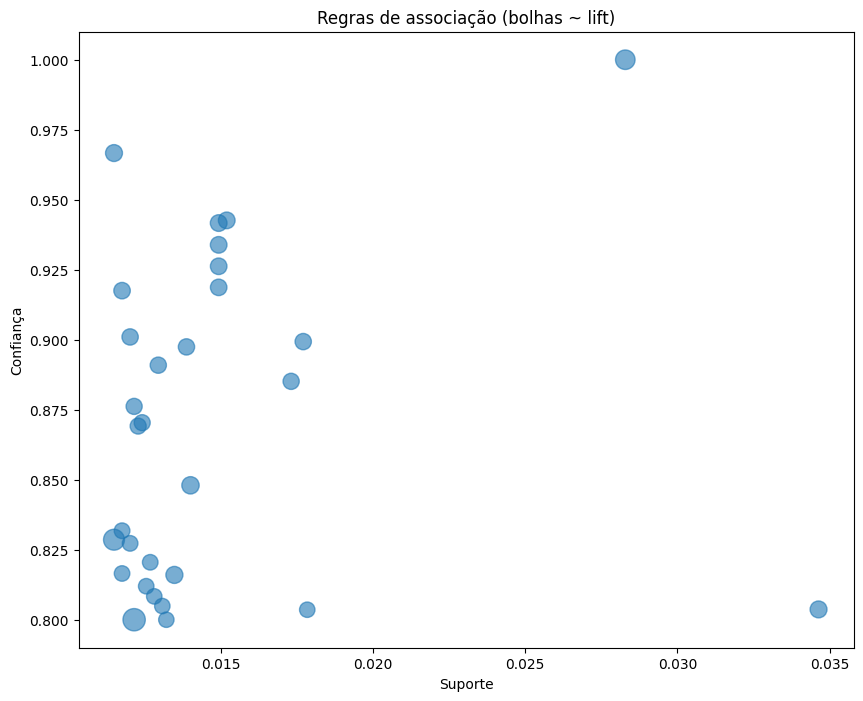

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
  rules['support'],
  rules['confidence'],
  s=rules['lift']*20,
  alpha=0.6
)
plt.xlabel("Suporte")
plt.ylabel("Confiança")
plt.title("Regras de associação (bolhas ~ lift)")
plt.show()